In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = r"D:\filetraning\data3.txt"

data = pd.read_csv(path, header=None,names=['Exam 1','Exam 2','Admitted'])

In [3]:
print('data = ')
print(data.head(10))
print('*'*30)
print('data.describe = ')
print(data.describe())

data = 
      Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
5  45.083277  56.316372         0
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1
9  84.432820  43.533393         1
******************************
data.describe = 
           Exam 1      Exam 2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


In [4]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

print('*'*30)
print('Admitted student \n', positive)
print('*'*30)
print('Noneadmitted student \n', negative)

******************************
Admitted student 
        Exam 1     Exam 2  Admitted
3   60.182599  86.308552         1
4   79.032736  75.344376         1
6   61.106665  96.511426         1
7   75.024746  46.554014         1
8   76.098787  87.420570         1
9   84.432820  43.533393         1
12  82.307053  76.481963         1
13  69.364589  97.718692         1
15  53.971052  89.207350         1
16  69.070144  52.740470         1
18  70.661510  92.927138         1
19  76.978784  47.575964         1
21  89.676776  65.799366         1
24  77.924091  68.972360         1
25  62.271014  69.954458         1
26  80.190181  44.821629         1
30  61.379289  72.807887         1
31  85.404519  57.051984         1
33  52.045405  69.432860         1
37  64.176989  80.908061         1
40  83.902394  56.308046         1
42  94.443368  65.568922         1
46  77.193035  70.458200         1
47  97.771599  86.727822         1
48  62.073064  96.768824         1
49  91.564974  88.696293         1
50  7

******************************


Text(0, 0.5, 'Exam 2 Score')

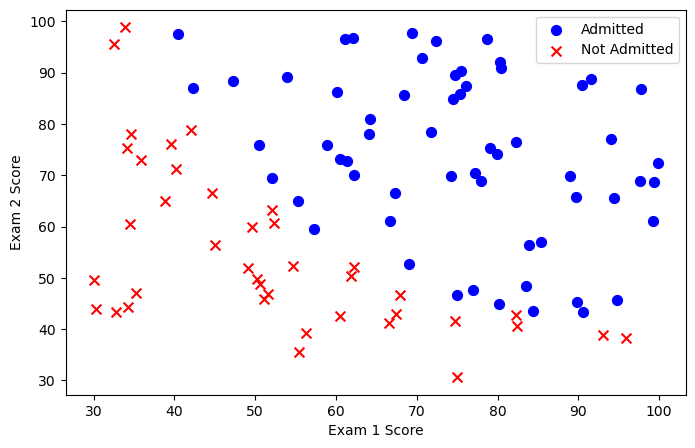

In [7]:
print('*'*30)

fig,ax = plt.subplots(figsize=(8,5))

ax.scatter(positive['Exam 1'], positive['Exam 2'], 
          s=50, c='b', marker = 'o', label='Admitted')

ax.scatter(negative['Exam 1'], negative['Exam 2'],
          s=50, c='r', marker = 'x', label = 'Not Admitted')

ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

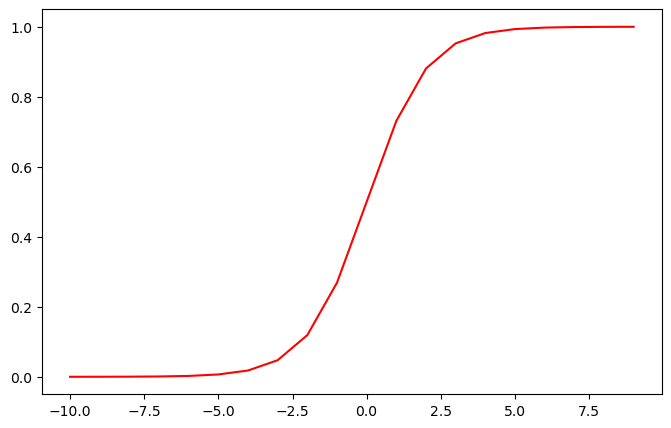

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

nums = np.arange(-10, 10, step = 1)

fig,ax = plt.subplots(figsize=(8,5))

ax.plot(nums, sigmoid(nums), 'r')

In [9]:
data.insert(0,'Ones',1)

print('new data \n',data)
print('*'*30)

new data 
     Ones     Exam 1     Exam 2  Admitted
0      1  34.623660  78.024693         0
1      1  30.286711  43.894998         0
2      1  35.847409  72.902198         0
3      1  60.182599  86.308552         1
4      1  79.032736  75.344376         1
..   ...        ...        ...       ...
95     1  83.489163  48.380286         1
96     1  42.261701  87.103851         1
97     1  99.315009  68.775409         1
98     1  55.340018  64.931938         1
99     1  74.775893  89.529813         1

[100 rows x 4 columns]
******************************


In [10]:
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

print('X \n', X)
print('*'*30)
print('y \n', y)
print('*'*30)

X 
     Ones     Exam 1     Exam 2
0      1  34.623660  78.024693
1      1  30.286711  43.894998
2      1  35.847409  72.902198
3      1  60.182599  86.308552
4      1  79.032736  75.344376
..   ...        ...        ...
95     1  83.489163  48.380286
96     1  42.261701  87.103851
97     1  99.315009  68.775409
98     1  55.340018  64.931938
99     1  74.775893  89.529813

[100 rows x 3 columns]
******************************
y 
     Admitted
0          0
1          0
2          0
3          1
4          1
..       ...
95         1
96         1
97         1
98         1
99         1

[100 rows x 1 columns]
******************************


In [11]:
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

print('X \n', X)
print('*'*30)
print('y \n', y)
print('*'*30)

X 
 [[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         62.2710

In [12]:
print('*'*30)
print('X.shape = ', X.shape)
print('thea.shape = ', theta.shape)
print('y.shape = ', y.shape)

******************************
X.shape =  (100, 3)
thea.shape =  (3,)
y.shape =  (100, 1)


In [13]:
#Cost 

def cost(thetav, Xv, yv):
    thetav = np.matrix(thetav)
    Xv = np.matrix(Xv)
    yv = np.matrix(yv)

    first = np.multiply(-yv, np.log(sigmoid(Xv * thetav.T)))
    second = np.multiply((1 - yv), np.log(1 - sigmoid(Xv * thetav.T)))
    return np.sum(first - second) / (len(Xv))



In [14]:
thiscost = cost(theta, X, y)
print('*'*30)
print('cost = ', thiscost)

******************************
cost =  0.6931471805599453


In [15]:
#Gradient 

def gradient(thetav, Xv, yv):
    thetav = np.matrix(thetav)
    Xv = np.matrix(Xv)
    yv = np.matrix(yv)

    parameters = int(thetav.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(Xv * thetav.T) - yv

    for i in range(parameters):
        term = np.multiply(error, Xv[:, i])
        grad[i] = np.sum(term) / len(Xv)

    return grad



In [16]:
import scipy.optimize as opt

result = opt.fmin_tnc(func=cost, x0=theta,
                     fprime=gradient, args=(X, y))


In [17]:
print("*"*30)
print('result = ', result)

******************************
result =  (array([-25.16131865,   0.20623159,   0.20147149]), 36, 0)


In [18]:
costafteroptmize = cost(result[0], X, y)

print()
print("cost after optmize = ", costafteroptmize)
print()


cost after optmize =  0.20349770158947447



In [19]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)


In [20]:
print('Predictions = ', predictions)

Predictions =  [0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]


In [21]:
correct = [1 if ((a == 1 and b == 1) or
                (a == 0 and b == 0)) else 0
                for (a,b) in zip(predictions, y)]

accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%
